# Part 1: Join the Duet Server the Data Owner connected to

In [1]:
import syft as sy

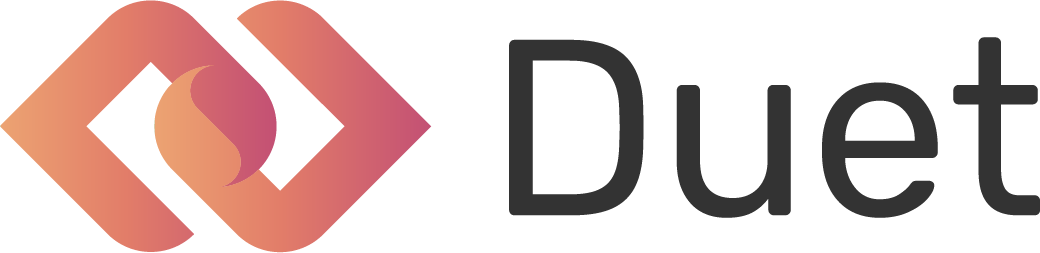

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000/
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following Duet Client ID to your duet partner!
♫♫♫ > Duet Client ID: 2342415d504b84622dc52cdd2edb6ed4

♫♫♫ > ...waiting for partner to connect...

♫♫♫ > CONNECTED!


In [2]:
duet = sy.join_duet('db2f2ebb5705fff98163895c557f19b7', network_url="http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000/")


### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 0 : Now STOP and run the Data Owner notebook until Checkpoint 1.

# Part 2: Search for Available Data

In [3]:
# The data scientist can check the list of searchable data in Data Owner's duet store
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 9d332ea6e236416896416f2194bedcb2>,[ages],This is a list of ages of 6 people.,<class 'torch.Tensor'>
1,<UID: 591cb03e420d4509b1d5c1c570fb919d>,[ages],This is a list of ages of 6 people.,<class 'torch.Tensor'>


In [9]:
# Data Scientist likes the age data. (S)He needs a pointer to it.

#data_ptr = duet.store[0] 
#data_ptr = duet.store['ages']

# data_ptr is a reference to the age dataset remotely available on data owner's server
print(data_ptr)

# Part 3: Perform some basic analysis on the data
Now the data scientist can perform analysis on the data that is in the Data Owner's duet server, without the owner having to share his/her data.

### Get average age

In [10]:
average_age = data_ptr.float().mean()

In [11]:
# Now the Data Scientist wants to download the result.

try:
    average_age.get()
except Exception as e:
    print(e)

You do not have permission to .get() Object with ID: <UID: d5ac77ae51c948a587820a9ee24b8c8b>Please submit a request.


[2021-03-23T22:54:22.445745-0400][CRITICAL][logger]][40322] You do not have permission to .get() Object with ID: <UID: d5ac77ae51c948a587820a9ee24b8c8b>Please submit a request.


In [12]:
# Looks like the Data Scientist does not have permission to download this result! He/she needs
# to make a request to the Data Owner.

average_age.request(reason="Please approve!")

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 1 : Now STOP and run the Data Owner notebook until Checkpoint 2.

In [8]:
try:
    average_age.get()
except Exception as e:
    print(e)

You do not have permission to .get() Object with ID: <UID: f4a594185a694ce8a9a6f9ad101560ac>Please submit a request.


In [9]:
average_age.request(
    reason="I am a data scientist and I need to know the average age for my analysis."
)

In [10]:
duet.requests.pandas

,Name,Reason,Request ID,Requested Object's ID
0,,I am a data scientist and I need to know the a...,<UID: 9b41487d464c4fab98e602b5a59f5605>,<UID: f4a594185a694ce8a9a6f9ad101560ac>


### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 2 : Now STOP and run the Data Owner notebook until the next checkpoint.

In [11]:
# Once the request is approved - the data scientist can download the result!
avg = average_age.get()
print(avg)

tensor(46.8333)


### Get min and max age

In [12]:
duet.torch

Module:
	.Tensor -> Tensor
	.BFloat16Tensor -> BFloat16Tensor
	.BoolTensor -> BoolTensor
	.ByteTensor -> ByteTensor
	.CharTensor -> CharTensor
	.DoubleTensor -> DoubleTensor
	.FloatTensor -> FloatTensor
	.HalfTensor -> HalfTensor
	.IntTensor -> IntTensor
	.LongTensor -> LongTensor
	.ShortTensor -> ShortTensor
	.nn -> Module:
		.Parameter -> Parameter
		.Module -> Module
		.Conv2d -> Conv2d
		.Dropout2d -> Dropout2d
		.Linear -> Linear
		.functional -> Module:
			.relu -> <syft.ast.function.Function object at 0x7ff2805170d0>
			.max_pool2d -> <syft.ast.function.Function object at 0x7ff280517100>
			.log_softmax -> <syft.ast.function.Function object at 0x7ff280517130>
			.cosine_embedding_loss -> <syft.ast.function.Function object at 0x7ff280517b50>
			.ctc_loss -> <syft.ast.function.Function object at 0x7ff280517b80>
			.hinge_embedding_loss -> <syft.ast.function.Function object at 0x7ff280517bb0>
			.l1_loss -> <syft.ast.function.Function object at 0x7ff280517be0>
			.margin_ranking_lo

In [26]:
max_age_ptr = data_ptr.float().amax()
min_age_ptr = data_ptr.float().amin()

In [27]:
max_age_result = max_age_ptr.get(
    request_block=True,
    reason="download the maximum age",
    timeout_secs=10,
)

print(max_age_result)

tensor(88.)


In [28]:
min_age_result = min_age_ptr.get(
    request_block=True,
    reason="download the minimum age",
    timeout_secs=10,
)

print(min_age_result)

tensor(22.)


## Let's cheat!

In [29]:
age_data = data_ptr.get(request_block=True, delete_obj=False)

print(age_data)

tensor([25, 32, 49, 65, 88, 22])


Please note in the later releases there will be features for the verification of the requests made by data scientists so that they cannot be exploited in anyway. In later courses different techniques for making this whole process more robust will be covered. So stay tuned!

For this course, it is a great way for you to debug your codes and sanity check!

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 3 : Well done!